## Chap3. Save Weight & Model 1
Weight와 Model을 저장하는법 너무쉬움

`model.save_weights("model.h5")` 을 사용하면 "Model" 과 " 학습된 Weights"가 동시에 저장됨


### 1. Import

In [16]:
import numpy as np
from keras.callbacks import EarlyStopping
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.utils import to_categorical
np.random.seed(1000)

### 2. Load cifar10

In [17]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

### 3. Construct CNN Model

In [18]:
# Create the model
model = Sequential()

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), padding = 'same',strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(8, 8, 64)))
model.add(MaxPooling2D(pool_size=(3, 3), padding = 'same',strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 128)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 128)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(8, 8, 128)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(384, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### 4. Compile The Model 

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

### 5.Train Model

In [21]:
hist = model.fit(X_train / 255.0, to_categorical(Y_train),
              batch_size=128,
              shuffle=True,
              epochs=1,
              validation_data=(X_test / 255.0, to_categorical(Y_test)),
              callbacks=[EarlyStopping(min_delta=0.001, patience=3)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 12s 241us/step - loss: 0.8348 - acc: 0.7038 - val_loss: 0.8137 - val_acc: 0.7166


### 6. Evaluation

In [22]:
# Evaluate the model
scores = model.evaluate(X_test / 255.0, to_categorical(Y_test))

print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

10000/10000 [==============================] - 1s 130us/step
Loss: 0.814
Accuracy: 0.717


### 7. Save Model 
지금까지 만든 모델을 저장함 
참고로 다시 불러오면 다시 컴파일해야한다

In [23]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')

### appendix 8. 저장한 모델 불러와 보기
어짜피 다음 챕터에서 할것이지만 그래도 한번 해보기. 

나의 경우 
`ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot` 
`pip install pydot` 

In [25]:
from keras.models import load_model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
%matplotlib inline

In [26]:
model = load_model('mnist_mlp_model.h5')

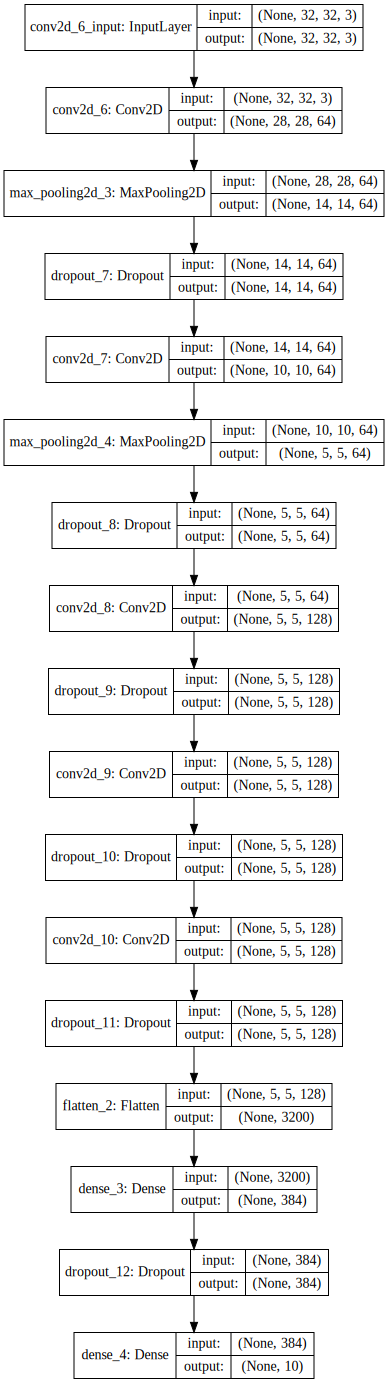

In [30]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [28]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'